In [1]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
sys.path.append('../../../../veneer-py')
# Get the Source scripting components (veneer) and GBR specific stuff
import veneer
import gbr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
gbr.init('D:/Beckers/outputs/Scenario 1/')
gbr.available()

['Beta3810',
 'Beta3810FixNodes',
 'Beta3810Inflow',
 'Beta3810Junk',
 'Beta3810MinFlow',
 'Beta3810RemoveConts',
 'Beta3810Test',
 'Beta3810_2',
 'Beta3810_DoubleUSLE',
 'Beta3810_EMC',
 'Beta3810_FixRout',
 'Beta3810_test',
 'Beta3815',
 'Beta3815_RoutFix',
 'Beta3817',
 'Beta3818',
 'Beta381822',
 'Beta3818Check',
 'Beta3818Cmd',
 'Beta3818NoConst',
 'Beta3818_2',
 'Beta3818_3',
 'Beta3818_Extend',
 'Beta3818_NoCropOth',
 'Beta3818_NoFP',
 'Beta3818_NoFP2',
 'Beta3818_NoFP_PlusRes',
 'Beta3818_ReLoadClim',
 'Beta3818_WarmUp',
 'Beta3819',
 'Beta3820',
 'Beta3820Cmd',
 'RecycleTest',
 'RegContributorDataGrid_3818.csv',
 'RegContributorDataGrid_3818_New.csv',
 'TestingPrep']

In [9]:
results = gbr.Results('Beta3818Cmd')
results.available()

['climateTable',
 'CrossTabOutputsTable',
 'fuAreasTable',
 'FURatesTable',
 'FUSummaryTable',
 'joel_contributor',
 'latest_contributor',
 'OutletNodesRatesTable',
 'OverallSummaryTable',
 'ParameterTable',
 'RawResults',
 'RegionalSourceSinkSummaryTable',
 'RegionalSummaryTable',
 'RSDRTable',
 'SourceSinkPerFuSummaryTable',
 'SourceSinkSummaryTable',
 'TimeSeriesTable']

In [10]:
contributor = results.get('RegContributorDataGrid')
contributor[0::500]

OSError: File b'D:/Beckers/outputs/Scenario 1/Beta3818Cmd\\RegContributorDataGrid.csv' does not exist

In [10]:
constituent = 'Sediment - Fine'
contribution_by_constituent = contributor[contributor.Constituent==constituent]
contribution_by_constituent[0::100]

,ModelElement,Constituent,FU,Process,LoadToStream (kg),LoadToRegExport (kg),RSDR,Num_Days
Rep_Region,,,,,,,,
agmid,SC #5,Sediment - Fine,Cropping,Undefined,0,0,1.000000,2556
agmid,SC #2,Sediment - Fine,Other,Hillslope no source distinction,0,0,0.839726,2556
agmid,SC #3,Sediment - Fine,Cropping,Hillslope surface soil,0,0,0.318546,2556
agmid,SC #4,Sediment - Fine,Other,Hillslope sub-surface soil,0,0,0.773806,2556
agbot,SC #1,Sediment - Fine,Cropping,Diffuse Dissolved,0,0,0.994859,2556
agbot,SC #2,Sediment - Fine,Other,Streambank,0,0,0.835409,2556
agbot,SC #3,Sediment - Fine,Cropping,Point Source,0,0,0.316908,2556


In [22]:
contribution_aggregated = contribution_by_constituent.reset_index().groupby(['Rep_Region','FU']).sum()
contribution_aggregated

LoadToStream (kg)  LoadToRegExport (kg)       RSDR  \
Rep_Region FU                                                                   
agbot      Cropping             5.007476e+08          3.692114e+08  39.118636   
           Grazing              1.132774e+10          9.398142e+09  39.118636   
           Grazing Closed       2.359009e+10          7.677763e+09  39.118636   
           Other                8.937387e+08          6.292802e+08  39.118636   
           Stream               1.355382e+10          1.198714e+10  39.118636   
           Water                2.199010e+07          9.233695e+06  39.118636   
agmid      Cropping             4.554125e+08          3.257842e+08  29.320781   
           Grazing              1.015048e+10          8.269447e+09  29.320781   
           Grazing Closed       2.359009e+10          7.717438e+09  29.320781   
           Other                8.917052e+08          6.304986e+08  29.320781   
           Stream               8.386166e+09          6.881433e+09  29.320781   
           Water                2.168854e+07          8.979851e+06  29.320781   
agtop      Cropping             2.162664e+08          1.074397e+08  13.008429   
           Grazing              4.839354e+09          4.459457e+09  13.008429   
           Grazing Closed       2.347740e+10          9.077726e+09  13.008429   
           Other                7.647964e+08          6.204194e+08  13.008429   
           Stream               1.597769e+09          7.912810e+08  13.008429   
           Water                2.053283e+07          9.423323e+06  13.008429   

                           Num_Days  
Rep_Region FU                        
agbot      Cropping          127800  
           Grazing           127800  
           Grazing Closed    127800  
           Other             127800  
           Stream            127800  
           Water             127800  
agmid      Cropping          102240  
           Grazing           102240  
           Grazing Closed    102240  
           Other             102240  
           Stream            102240  
           Water             102240  
agtop      Cropping           51120  
           Grazing            51120  
           Grazing Closed     51120  
           Other              51120  
           Stream             51120  
           Water              51120

In [17]:
export = contribution_aggregated.reset_index().pivot('Rep_Region','FU','LoadToRegExport (kg)')
export

FU,Cropping,Grazing,Grazing Closed,Other,Stream,Water
Rep_Region,,,,,,
agbot,3.692114e+08,9.398142e+09,7.677763e+09,6.292802e+08,1.198714e+10,9233694.843422
agmid,3.257842e+08,8.269447e+09,7.717438e+09,6.304986e+08,6.881433e+09,8979850.631628
agtop,1.074397e+08,4.459457e+09,9.077726e+09,6.204194e+08,7.912810e+08,9423323.098825


In [18]:
supply = contribution_aggregated.reset_index().pivot('Rep_Region','FU','LoadToStream (kg)')
supply

FU,Cropping,Grazing,Grazing Closed,Other,Stream,Water
Rep_Region,,,,,,
agbot,5.007476e+08,1.132774e+10,2.359009e+10,8.937387e+08,1.355382e+10,21990101.995216
agmid,4.554125e+08,1.015048e+10,2.359009e+10,8.917052e+08,8.386166e+09,21688542.732348
agtop,2.162664e+08,4.839354e+09,2.347740e+10,7.647964e+08,1.597769e+09,20532825.171619


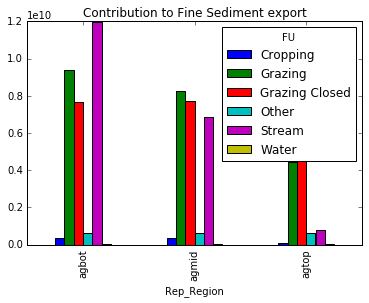

In [21]:
export.plot(kind='bar',title='Contribution to Fine Sediment export')

In [23]:
contribution_aggregated_by_process = contribution_by_constituent.reset_index().groupby(['Rep_Region','FU', 'Process']).sum()
contribution_aggregated_by_process

LoadToStream (kg)  \
Rep_Region FU             Process                                              
agbot      Cropping       Channel Remobilisation                0.000000e+00   
                          Diffuse Dissolved                     0.000000e+00   
                          Gully                                 5.007476e+08   
                          Hillslope no source distinction       0.000000e+00   
                          Hillslope sub-surface soil            0.000000e+00   
                          Hillslope surface soil                0.000000e+00   
                          Point Source                          0.000000e+00   
                          Seepage                               0.000000e+00   
                          Streambank                            0.000000e+00   
                          Undefined                             0.000000e+00   
           Grazing        Channel Remobilisation                0.000000e+00   
                          Diffuse Dissolved                     0.000000e+00   
                          Gully                                 1.076414e+10   
                          Hillslope no source distinction       0.000000e+00   
                          Hillslope sub-surface soil            1.128436e+08   
                          Hillslope surface soil                4.507592e+08   
                          Point Source                          0.000000e+00   
                          Seepage                               0.000000e+00   
                          Streambank                            0.000000e+00   
                          Undefined                             0.000000e+00   
           Grazing Closed Channel Remobilisation                0.000000e+00   
                          Diffuse Dissolved                     0.000000e+00   
                          Gully                                 2.318638e+10   
                          Hillslope no source distinction       0.000000e+00   
                          Hillslope sub-surface soil            6.051108e+07   
                          Hillslope surface soil                3.431971e+08   
                          Point Source                          0.000000e+00   
                          Seepage                               0.000000e+00   
                          Streambank                            0.000000e+00   
                          Undefined                             0.000000e+00   
...                                                                      ...   
agtop      Other          Channel Remobilisation                0.000000e+00   
                          Diffuse Dissolved                     0.000000e+00   
                          Gully                                 7.647964e+08   
                          Hillslope no source distinction       0.000000e+00   
                          Hillslope sub-surface soil            0.000000e+00   
                          Hillslope surface soil                0.000000e+00   
                          Point Source                          0.000000e+00   
                          Seepage                               0.000000e+00   
                          Streambank                            0.000000e+00   
                          Undefined                             0.000000e+00   
           Stream         Channel Remobilisation                0.000000e+00   
                          Diffuse Dissolved                     0.000000e+00   
                          Gully                                 0.000000e+00   
                          Hillslope no source distinction       0.000000e+00   
                          Hillslope sub-surface soil            0.000000e+00   
                          Hillslope surface soil                0.000000e+00   
                          Point Source                          0.000000e+00   
                          Seepage                          

In [25]:
contribution_aggregated_by_3process = contribution_by_constituent.reset_index().groupby(['Rep_Region','Process']).sum()
contribution_aggregated_by_3process

LoadToStream (kg)  \
Rep_Region Process                                              
agbot      Channel Remobilisation                1.023386e+09   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 3.536700e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            1.733546e+08   
           Hillslope surface soil                7.939563e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            1.253043e+10   
           Undefined                             0.000000e+00   
agmid      Channel Remobilisation                1.023386e+09   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 3.420394e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            1.648550e+08   
           Hillslope surface soil                7.405825e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            7.362781e+09   
           Undefined                             0.000000e+00   
agtop      Channel Remobilisation                0.000000e+00   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 2.891314e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            5.945241e+07   
           Hillslope surface soil                3.457562e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            1.597769e+09   
           Undefined                             0.000000e+00   

                                            LoadToRegExport (kg)       RSDR  \
Rep_Region Process                                                            
agbot      Channel Remobilisation                   1.018124e+09  23.471181   
           Diffuse Dissolved                        0.000000e+00  23.471181   
           Gully                                    1.741453e+10  23.471181   
           Hillslope no source distinction          0.000000e+00  23.471181   
           Hillslope sub-surface soil               1.270194e+08  23.471181   
           Hillslope surface soil                   5.420811e+08  23.471181   
           Point Source                             0.000000e+00  23.471181   
           Seepage                                  0.000000e+00  23.471181   
           Streambank                               1.096902e+10  23.471181   
           Undefined                                0.000000e+00  23.471181   
agmid      Channel Remobilisation                   1.023386e+09  17.592469   
           Diffuse Dissolved                        0.000000e+00  17.592469   
           Gully                                    1.634146e+10  17.592469   
           Hillslope no source distinction          0.000000e+00  17.592469   
           Hillslope sub-surface soil               1.191762e+08  17.592469   
           Hillslope surface soil                   4.915085e+08  17.592469   
           Point Source                             0.000000e+00  17.592469   
           Seepage                                  0.000000e+00  17.592469   
           Streambank                               5.858048e+09  17.592469   
           Undefined                                0.000000e+00  17.592469   
agtop      Channel Remobilisation                   0.000000e+00   7.805058   
           Diffuse Dissolved                        0.000000e+00   7.805058   
           Gully                                    1.407135e+10   

In [28]:
processes_of_interest=contribution_by_constituent[contribution_by_constituent.Process.isin(['Gully','Streambank','Hillslope sub-surface soil','Hillslope surface soil'])]
processes_of_interest

,ModelElement,Constituent,FU,Process,LoadToStream (kg),LoadToRegExport (kg),RSDR,Num_Days
Rep_Region,,,,,,,,
agmid,SC #5,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,1.000000,2556
agmid,SC #2,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.839726,2556
agmid,SC #3,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.318546,2556
agmid,SC #4,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.773806,2556
agbot,SC #1,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.994859,2556
agbot,SC #2,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.835409,2556
agbot,SC #3,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.316908,2556
agbot,SC #4,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.769828,2556
agbot,SC #5,Sediment - Fine,Cropping,Hillslope surface soil,0.000000e+00,0.000000e+00,0.994859,2556


In [31]:
processes_of_interest.reset_index().groupby(['Rep_Region','Process','FU']).sum()

LoadToStream (kg)  \
Rep_Region Process                    FU                                  
agbot      Gully                      Cropping             5.007476e+08   
                                      Grazing              1.076414e+10   
                                      Grazing Closed       2.318638e+10   
                                      Other                8.937387e+08   
                                      Stream               0.000000e+00   
                                      Water                2.199010e+07   
           Hillslope sub-surface soil Cropping             0.000000e+00   
                                      Grazing              1.128436e+08   
                                      Grazing Closed       6.051108e+07   
                                      Other                0.000000e+00   
                                      Stream               0.000000e+00   
                                      Water                0.000000e+00   
           Hillslope surface soil     Cropping             0.000000e+00   
                                      Grazing              4.507592e+08   
                                      Grazing Closed       3.431971e+08   
                                      Other                0.000000e+00   
                                      Stream               0.000000e+00   
                                      Water                0.000000e+00   
           Streambank                 Cropping             0.000000e+00   
                                      Grazing              0.000000e+00   
                                      Grazing Closed       0.000000e+00   
                                      Other                0.000000e+00   
                                      Stream               1.253043e+10   
                                      Water                0.000000e+00   
agmid      Gully                      Cropping             4.554125e+08   
                                      Grazing              9.648755e+09   
                                      Grazing Closed       2.318638e+10   
                                      Other                8.917052e+08   
                                      Stream               0.000000e+00   
                                      Water                2.168854e+07   
...                                                                 ...   
           Streambank                 Cropping             0.000000e+00   
                                      Grazing              0.000000e+00   
                                      Grazing Closed       0.000000e+00   
                                      Other                0.000000e+00   
                                      Stream               7.362781e+09   
                                      Water                0.000000e+00   
agtop      Gully                      Cropping             2.162664e+08   
                                      Grazing              4.777318e+09   
                                      Grazing Closed       2.313422e+10   
                                      Other                7.647964e+08   
                                      Stream               0.000000e+00   
                                      Water                2.053283e+07   
           Hillslope sub-surface soil Cropping             0.000000e+00   
                                      Grazing              1.234997e+07   
                                      Grazing Closed       4.710245e+07   
                                      Other                0.000000e+00   
                                      Stream               0.000000e+00   
                                      Water                0.000000e+00   
           Hillslope surface soil     Cropping             0.000000e+00   
                                      Grazing              4.968679e+07   
                                      Grazing Closed       2.960694e+08   
    

In [33]:
sum_by_region=contribution_by_constituent.reset_index().groupby('Rep_Region').sum()
sum_by_region

,LoadToStream (kg),LoadToRegExport (kg),RSDR,Num_Days
Rep_Region,,,,
agbot,4.988813e+10,3.007077e+10,234.711814,766800
agmid,4.349555e+10,2.383358e+10,175.924686,613440
agtop,3.091611e+10,1.506575e+10,78.050575,306720


In [34]:
contribution_aggregated_by_3process

LoadToStream (kg)  \
Rep_Region Process                                              
agbot      Channel Remobilisation                1.023386e+09   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 3.536700e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            1.733546e+08   
           Hillslope surface soil                7.939563e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            1.253043e+10   
           Undefined                             0.000000e+00   
agmid      Channel Remobilisation                1.023386e+09   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 3.420394e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            1.648550e+08   
           Hillslope surface soil                7.405825e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            7.362781e+09   
           Undefined                             0.000000e+00   
agtop      Channel Remobilisation                0.000000e+00   
           Diffuse Dissolved                     0.000000e+00   
           Gully                                 2.891314e+10   
           Hillslope no source distinction       0.000000e+00   
           Hillslope sub-surface soil            5.945241e+07   
           Hillslope surface soil                3.457562e+08   
           Point Source                          0.000000e+00   
           Seepage                               0.000000e+00   
           Streambank                            1.597769e+09   
           Undefined                             0.000000e+00   

                                            LoadToRegExport (kg)       RSDR  \
Rep_Region Process                                                            
agbot      Channel Remobilisation                   1.018124e+09  23.471181   
           Diffuse Dissolved                        0.000000e+00  23.471181   
           Gully                                    1.741453e+10  23.471181   
           Hillslope no source distinction          0.000000e+00  23.471181   
           Hillslope sub-surface soil               1.270194e+08  23.471181   
           Hillslope surface soil                   5.420811e+08  23.471181   
           Point Source                             0.000000e+00  23.471181   
           Seepage                                  0.000000e+00  23.471181   
           Streambank                               1.096902e+10  23.471181   
           Undefined                                0.000000e+00  23.471181   
agmid      Channel Remobilisation                   1.023386e+09  17.592469   
           Diffuse Dissolved                        0.000000e+00  17.592469   
           Gully                                    1.634146e+10  17.592469   
           Hillslope no source distinction          0.000000e+00  17.592469   
           Hillslope sub-surface soil               1.191762e+08  17.592469   
           Hillslope surface soil                   4.915085e+08  17.592469   
           Point Source                             0.000000e+00  17.592469   
           Seepage                                  0.000000e+00  17.592469   
           Streambank                               5.858048e+09  17.592469   
           Undefined                                0.000000e+00  17.592469   
agtop      Channel Remobilisation                   0.000000e+00   7.805058   
           Diffuse Dissolved                        0.000000e+00   7.805058   
           Gully                                    1.407135e+10   

In [37]:
contribution_aggregated_by_3process*100/sum_by_region

LoadToStream (kg)  \
Rep_Region Process                                              
agbot      Channel Remobilisation                    2.051361   
           Diffuse Dissolved                         0.000000   
           Gully                                    70.892618   
           Hillslope no source distinction           0.000000   
           Hillslope sub-surface soil                0.347487   
           Hillslope surface soil                    1.591473   
           Point Source                              0.000000   
           Seepage                                   0.000000   
           Streambank                               25.117061   
           Undefined                                 0.000000   
agmid      Channel Remobilisation                    2.352851   
           Diffuse Dissolved                         0.000000   
           Gully                                    78.637805   
           Hillslope no source distinction           0.000000   
           Hillslope sub-surface soil                0.379016   
           Hillslope surface soil                    1.702663   
           Point Source                              0.000000   
           Seepage                                   0.000000   
           Streambank                               16.927666   
           Undefined                                 0.000000   
agtop      Channel Remobilisation                    0.000000   
           Diffuse Dissolved                         0.000000   
           Gully                                    93.521251   
           Hillslope no source distinction           0.000000   
           Hillslope sub-surface soil                0.192302   
           Hillslope surface soil                    1.118369   
           Point Source                              0.000000   
           Seepage                                   0.000000   
           Streambank                                5.168078   
           Undefined                                 0.000000   

                                            LoadToRegExport (kg)  RSDR  \
Rep_Region Process                                                       
agbot      Channel Remobilisation                       3.385761    10   
           Diffuse Dissolved                            0.000000    10   
           Gully                                       57.911817    10   
           Hillslope no source distinction              0.000000    10   
           Hillslope sub-surface soil                   0.422402    10   
           Hillslope surface soil                       1.802685    10   
           Point Source                                 0.000000    10   
           Seepage                                      0.000000    10   
           Streambank                                  36.477336    10   
           Undefined                                    0.000000    10   
agmid      Channel Remobilisation                       4.293881    10   
           Diffuse Dissolved                            0.000000    10   
           Gully                                       68.564866    10   
           Hillslope no source distinction              0.000000    10   
           Hillslope sub-surface soil                   0.500035    10   
           Hillslope surface soil                       2.062252    10   
           Point Source                                 0.000000    10   
           Seepage                                      0.000000    10   
           Streambank                                  24.578966    10   
           Undefined                                    0.000000    10   
agtop      Channel Remobilisation                       0.000000    10   
           Diffuse Dissolved                            0.000000    10   
           Gully                                       93.399646    10   
           Hillslope no source distinction              0.000000    10   
           Hillslope sub-surface soil  